Use umap for alternative dimentionality reduction in amplicon data of Ag1000g. Also add amplicon sequencing results and reference genomes.

Results:
- Major isolation is between gambiae and coluzzii, with an exception of `GW`, which is split between both (while it has intermediate position in PCA)
- Populations split out are `AOcol` and `FRgam`. Incomplete splits `GAgam`, `GW` - similar to PCA
- subsetting to non-missing sites used in PCA does not affect the results

In [1]:
import umap

In [2]:
%run common.ipynb

## Add sequenced samples

In [3]:
seq_dir = '../../../data/phylo_ampl_ag1k/seq_samples'
seq_meta_file = os.path.join(seq_dir, 'seq_samples.meta.csv')
seq_zarr_store = os.path.join(seq_dir, 'seq_samples.zarr')

In [4]:
seq_meta = pd.read_csv(seq_meta_file)
samples = pd.concat([samples, seq_meta], sort=False)
samples = samples.rename(columns={'pop_label':'Population'})
samples['Species'] = samples.m_s.replace({'M':'coluzzii','S':'gambiae','M/S':'hybrid'})
samples

,ox_code,src_code,population,country,region,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,Population,Species
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,95033368.0,30.99,Ghana $coluzzii$,coluzzii
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,95843804.0,31.70,Ghana $coluzzii$,coluzzii
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,David Weetman,NaN,2012.0,M,F,107420666.0,35.65,Ghana $coluzzii$,coluzzii
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,David Weetman,NaN,2012.0,M,F,95993752.0,29.46,Ghana $coluzzii$,coluzzii
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,David Weetman,NaN,2012.0,M,F,103044262.0,33.67,Ghana $coluzzii$,coluzzii
5,AA0048-C,Madina_A1,GHgam,Ghana,Madina,David Weetman,NaN,2012.0,S,F,101183648.0,32.64,Ghana $gambiae$,gambiae
6,AA0049-C,Madina_E3,GHcol,Ghana,Madina,David Weetman,NaN,2012.0,M,F,106641272.0,32.84,Ghana $coluzzii$,coluzzii
7,AA0050-C,Madina_E5,GHgam,Ghana,Madina,David Weetman,NaN,2012.0,S,F,93961924.0,29.82,Ghana $gambiae$,gambiae
8,AA0051-C,Twifo_Praso__C1,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,99910300.0,33.33,Ghana $coluzzii$,coluzzii
9,AA0052-C,Twifo_Praso__F2,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,100899280.0,32.29,Ghana $coluzzii$,coluzzii


In [5]:
seq_callset = zarr.open(seq_zarr_store, 'r')

## All and filtered SNPs

In [6]:
# concatenate all and biallelic variant nalts into a single array
ampl_nalts = dict()
ampl_flt_nalts = dict()
for ampl in callset:
    flt = callset[ampl]['biallelic'][:]
    nalt_ag = callset[ampl]['NALT'][:]
    nalt_seq = seq_callset[ampl]['NALT'][:]
    nalt = np.concatenate([nalt_ag, nalt_seq], axis=1)
    ampl_nalts[ampl] = nalt
    ampl_flt_nalts[ampl] = nalt[flt]
comb_nalts = np.concatenate([ampl_nalts[ampl] for ampl in callset])
comb_flt_nalts = np.concatenate([ampl_flt_nalts[ampl] for ampl in callset])
display(comb_nalts.shape, comb_flt_nalts.shape)

(2112, 1153)

(1409, 1153)

In [7]:
samples

,ox_code,src_code,population,country,region,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,Population,Species
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,95033368.0,30.99,Ghana $coluzzii$,coluzzii
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,95843804.0,31.70,Ghana $coluzzii$,coluzzii
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,David Weetman,NaN,2012.0,M,F,107420666.0,35.65,Ghana $coluzzii$,coluzzii
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,David Weetman,NaN,2012.0,M,F,95993752.0,29.46,Ghana $coluzzii$,coluzzii
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,David Weetman,NaN,2012.0,M,F,103044262.0,33.67,Ghana $coluzzii$,coluzzii
5,AA0048-C,Madina_A1,GHgam,Ghana,Madina,David Weetman,NaN,2012.0,S,F,101183648.0,32.64,Ghana $gambiae$,gambiae
6,AA0049-C,Madina_E3,GHcol,Ghana,Madina,David Weetman,NaN,2012.0,M,F,106641272.0,32.84,Ghana $coluzzii$,coluzzii
7,AA0050-C,Madina_E5,GHgam,Ghana,Madina,David Weetman,NaN,2012.0,S,F,93961924.0,29.82,Ghana $gambiae$,gambiae
8,AA0051-C,Twifo_Praso__C1,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,99910300.0,33.33,Ghana $coluzzii$,coluzzii
9,AA0052-C,Twifo_Praso__F2,GHcol,Ghana,Twifo_Praso,David Weetman,NaN,2012.0,M,F,100899280.0,32.29,Ghana $coluzzii$,coluzzii


## UMAP

In [8]:
embedding = umap.UMAP(n_components=2, n_neighbors=15, min_dist=2, spread=5, metric='euclidean', random_state=42).fit_transform(comb_nalts.T)
embedding.shape

/Users/am60/malaria/malariagen/binder/conda/envs/17_ag1k_analysis/lib/python3.6/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


(1153, 2)

In [9]:
samples['umap1'] = embedding[:, 0]
samples['umap2'] = embedding[:, 1]

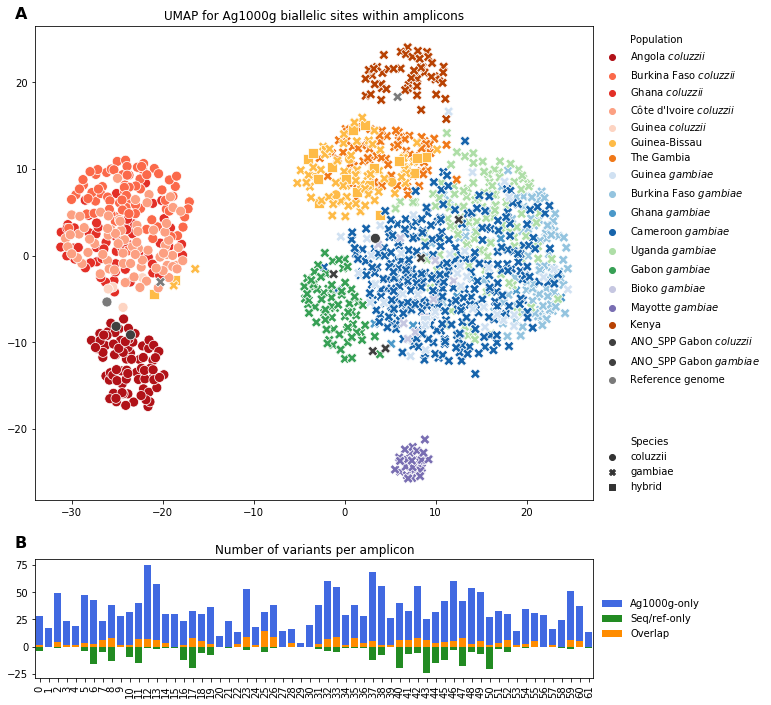

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios':(4,1)})
# umap
sns.scatterplot(data=samples, 
                x='umap1', 
                y='umap2', 
                hue='Population',
                hue_order=pop_labels.values(),
                style='Species',
                alpha=1,
                s=100,
                palette=pop_colors,
                ax=ax1)
# ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2)
# split legend
lhl = ax1.get_legend_handles_labels()
first_legend = ax1.legend(lhl[0][:-4], lhl[1][:-4], loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
ax1.add_artist(first_legend)
ax1.legend(lhl[0][-4:], lhl[1][-4:], loc='lower left', bbox_to_anchor=(1, 0), frameon=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('UMAP for Ag1000g biallelic sites within amplicons');
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
# variation
for ampl in range(62):
    w = .8
    ampl = str(ampl)
    raw_isvar = np.any((seq_callset[ampl]['raw_nalt'][:] > 0), axis=1) # not considering all ALT - PEST is all REF
    isvar = np.any((seq_callset[ampl]['NALT'][:] > 0), axis=1) # not considering all ALT - PEST is all REF
    p0 = ax2.bar(ampl, isvar.shape[0], color='royalblue', width=w)
    p1 = ax2.bar(ampl, isvar.sum()-raw_isvar.sum(), color='forestgreen', width=w)
    p2 = ax2.bar(ampl, isvar.sum(), color='darkorange', width=w)
    ax2.legend((p0[0], p1[0], p2[0]), 
               ('Ag1000g-only',
                'Seq/ref-only', 
                'Overlap',),
              loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax2.set_xlim([-.5,61.5])
ax2.set_xticklabels(range(62), rotation=90)
ax2.set_title('Number of variants per amplicon');
# subplot labels
for label, ax, yloc in zip('A B'.split(), (ax1, ax2), (1.04, 1.2)):
    ax.text(-0.015, yloc, label, transform=ax.transAxes,
          fontsize=16, fontweight='bold', va='top', ha='right')
plt.savefig('data/Fig4.pdf')
plt.show()

In [11]:
lhl[1][:-4]

['Population',
 'Angola $coluzzii$',
 'Burkina Faso $coluzzii$',
 'Ghana $coluzzii$',
 "Côte d'Ivoire $coluzzii$",
 'Guinea $coluzzii$',
 'Guinea-Bissau',
 'The Gambia',
 'Guinea $gambiae$',
 'Burkina Faso $gambiae$',
 'Ghana $gambiae$',
 'Cameroon $gambiae$',
 'Uganda $gambiae$',
 'Gabon $gambiae$',
 'Bioko $gambiae$',
 'Mayotte $gambiae$',
 'Kenya',
 'ANO_SPP Gabon $coluzzii$',
 'ANO_SPP Gabon $gambiae$',
 'Reference genome']

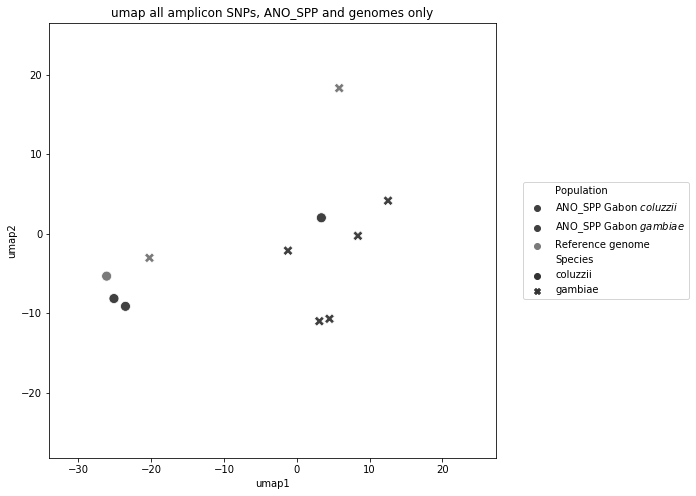

In [12]:
# UMAP without ag1k
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(data=samples[1142:], 
                x='umap1', 
                y='umap2', 
                hue='Population',
                style='Species',
#                 alpha=.5,
                s=100,
                palette=pop_colors,
                ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('umap all amplicon SNPs, ANO_SPP and genomes only');

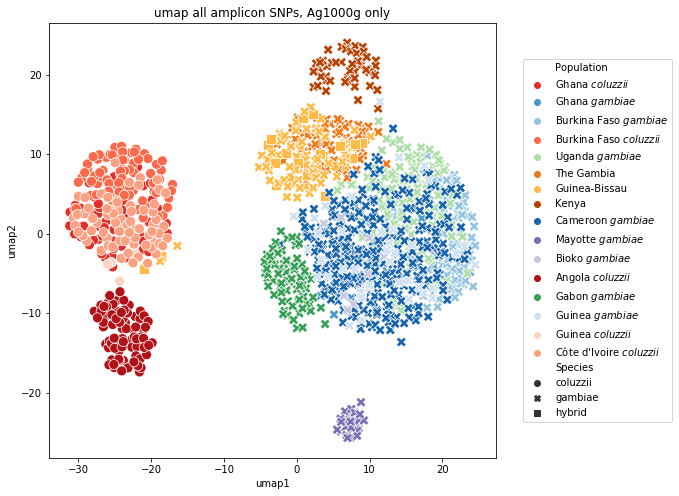

In [13]:
# UMAP without sequenced samples
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(data=samples.iloc[:1142], 
                x='umap1', 
                y='umap2', 
                hue='Population',
                style='Species',
                alpha=1,
                s=100,
                palette=pop_colors,
                ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set_title('umap all amplicon SNPs, Ag1000g only');

/Users/am60/malaria/malariagen/binder/conda/envs/17_ag1k_analysis/lib/python3.6/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


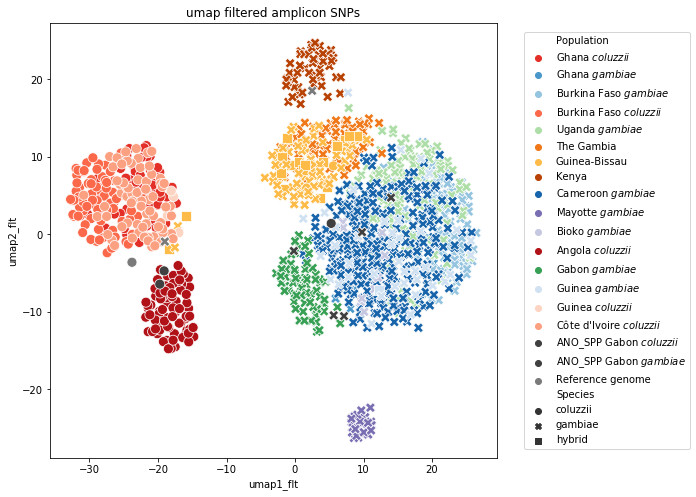

In [14]:
embedding_flt = umap.UMAP(n_components=2, n_neighbors=15, min_dist=2, spread=5, metric='euclidean', random_state=42).fit_transform(comb_flt_nalts.T)
samples['umap1_flt'] = embedding_flt[:, 0]
samples['umap2_flt'] = embedding_flt[:, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(data=samples, 
                x='umap1_flt', 
                y='umap2_flt', 
                hue='Population',
                style='Species',
                s=100,
                palette=pop_colors,
                ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set_title('umap filtered amplicon SNPs');